# Task 1 

https://github.com/flod1n/R7022E-AI-in-processindustry-and-automation/tree/main/Lab2_unsupervised

In [2]:
import pandas as pd

df_ff_train = pd.read_csv("tep_faultfree_training.csv")
df_ff_test = pd.read_csv("tep_faultfree_testing.csv")
df_f_train = pd.read_csv("tep_faulty_training.csv")
df_f_test = pd.read_csv("tep_faulty_testing.csv")
df_mixed_labeled = pd.read_csv("tep_mixed_labeled.csv")

df_ff_train.head()

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,label
0,0,1,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,...,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447,1
1,0,1,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,...,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194,1
2,0,1,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,...,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530,1
3,0,1,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,...,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089,1
4,0,1,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,...,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461,1


## Standardization

We standardize the datasets. I realized we cannot fit the transform between fault-free and faulty. Are they not sampled from the same set? Anyways, every set gets its own fit.

In [3]:
from sklearn.preprocessing import StandardScaler
import numpy as np

def scale_df(df, scaler):

    features_scaled = scaler.transform(df.iloc[:, :55])
    labels = df.iloc[:, 55:56].to_numpy().reshape(-1, 1)
    X_scaled = np.hstack([features_scaled, labels])
    df_scaled = pd.DataFrame(X_scaled, columns=df.columns, index=df.index)

    return df_scaled


scaler = StandardScaler()
scaler.fit(df_ff_train.iloc[:, :55]) # fit to ff training, without labels

df_ff_train = scale_df(df_ff_train, scaler)
df_ff_test = scale_df(df_ff_test, scaler)
df_f_train = scale_df(df_f_train, scaler)
df_f_test = scale_df(df_f_test, scaler)

# scaler.fit(df_mixed_labeled.iloc[:, :55])
# df_mixed_std = scale_df(df_mixed_labeled, scaler) # has one column too much?
df_ff_train.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,label
count,25000.0,25000.00,25000.00,25000.00,25000.00,25000.00,25000.00,25000.00,25000.00,25000.00,...,25000.00,25000.00,25000.00,25000.00,25000.00,25000.00,25000.00,25000.00,25000.00,25000.0
mean,0.0,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,...,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,1.0
std,0.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.0
min,0.0,-1.70,-1.73,-3.84,-4.25,-3.91,-3.71,-3.39,-3.74,-3.31,...,-3.93,-4.19,-3.55,-3.82,-3.67,-3.92,-3.65,-4.62,-3.82,1.0
25%,0.0,-0.87,-0.86,-0.66,-0.67,-0.67,-0.68,-0.68,-0.68,-0.67,...,-0.66,-0.68,-0.66,-0.68,-0.68,-0.68,-0.61,-0.68,-0.68,1.0
50%,0.0,0.00,0.00,0.01,-0.01,-0.01,0.01,-0.00,0.01,0.00,...,0.01,-0.00,-0.02,-0.00,-0.00,-0.00,-0.07,-0.00,0.01,1.0
75%,0.0,0.87,0.86,0.67,0.68,0.67,0.68,0.69,0.69,0.67,...,0.67,0.68,0.65,0.67,0.68,0.68,0.62,0.67,0.68,1.0
max,0.0,1.70,1.73,4.33,3.84,3.91,3.62,4.18,4.18,4.31,...,4.23,3.88,4.10,3.71,3.54,3.88,3.89,3.99,4.11,1.0


## PCA model 

### PCA model fitted on fault-free

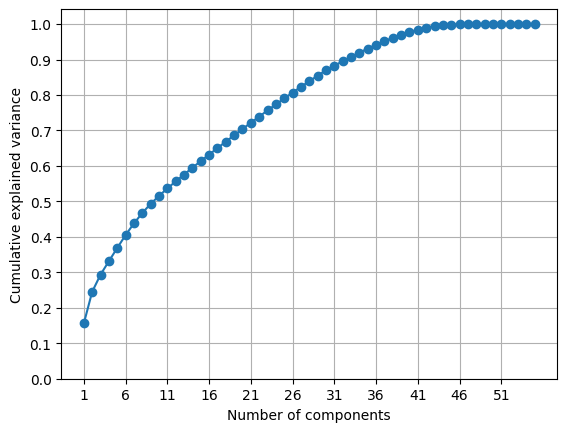

Explained variance by the first 10 components:
PC1: 15.59%
PC2: 8.92%
PC3: 4.83%
PC4: 3.79%
PC5: 3.73%
PC6: 3.63%
PC7: 3.29%
PC8: 2.93%
PC9: 2.59%
PC10: 2.23%


In [4]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

X_ff_train = df_ff_train.iloc[:, :55].values

pca = PCA(n_components=55)
pca.fit(X_ff_train)

x = np.arange(1, 56)
plt.plot(x,np.cumsum(pca.explained_variance_ratio_),marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.xticks(range(1, 56, 5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid(True)
plt.show()

print("Explained variance by the first 10 components:")
for i in range(10):
    print(f"PC{i+1}: {pca.explained_variance_ratio_[i]*100:.2f}%")


Looks like we need at least 20-21 components for >70% variance.

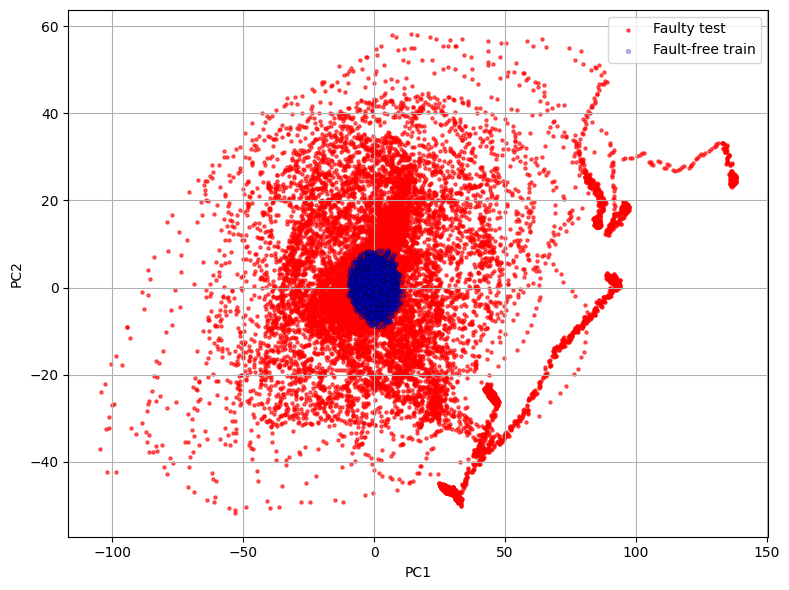

In [5]:
pca2 = PCA(n_components=21)
pca2.fit(X_ff_train)

X_ff_test = df_ff_test.iloc[:, :55].values
X_f_test = df_f_test.iloc[:, :55].values
X_ff_train = df_ff_train.iloc[:, :55].values

X_ff_test_pca = pca2.transform(X_ff_test)
X_f_test_pca = pca2.transform(X_f_test)
X_ff_train_pca = pca2.transform(X_ff_train)

plt.figure(figsize=(8,6))

plt.scatter(
    X_f_test_pca[:, 0], X_f_test_pca[:, 1],
    s=5, alpha=0.6, color='red', label='Faulty test'
)
plt.scatter(
    X_ff_test_pca[:, 0], X_ff_test_pca[:, 1],
    s=10, alpha=0.3, color='blue', edgecolors='black',
    linewidths=0.5, marker='o', label='Fault-free train', zorder=2
)
# plt.scatter(
#     X_ff_train_pca[:, 0], X_ff_train_pca[:, 1],
#     s=10, alpha=0.1, color='green', edgecolors='black',
#     linewidths=0.3, marker='o', label='Fault-free test', zorder=3
# )

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


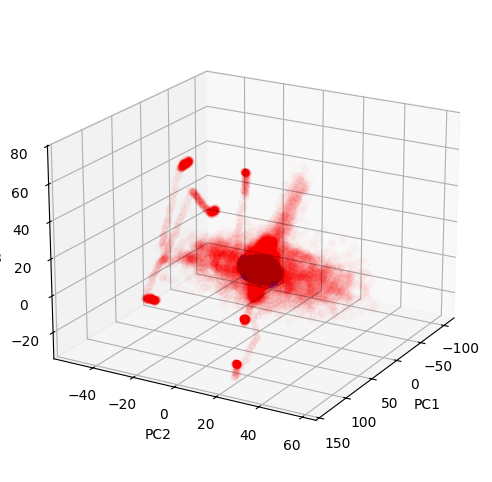

In [23]:
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')

# Faulty test
ax.scatter3D(
    X_f_test_pca[:, 0], X_f_test_pca[:, 1], X_f_test_pca[:, 2],
    color='red', alpha = 0.01
)

# Fault-free test
ax.scatter3D(
    X_ff_test_pca[:, 0], X_ff_test_pca[:, 1], X_ff_test_pca[:, 2],
    color='blue', alpha=0.5
)

# Labels
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

ax.view_init(elev=20., azim=30)

plt.show()


## Hotellings T^2 statistics

In [24]:
T2_ff = np.sum((X_ff_test_pca**2 / (pca2.explained_variance_)), axis=1)
T2_f = np.sum((X_f_test_pca**2 / (pca2.explained_variance_)), axis=1)
T2_ff_train = np.sum((X_ff_train_pca**2 / (pca2.explained_variance_)), axis=1)

## T^2 threshold

T² limit: 32.70567904670097


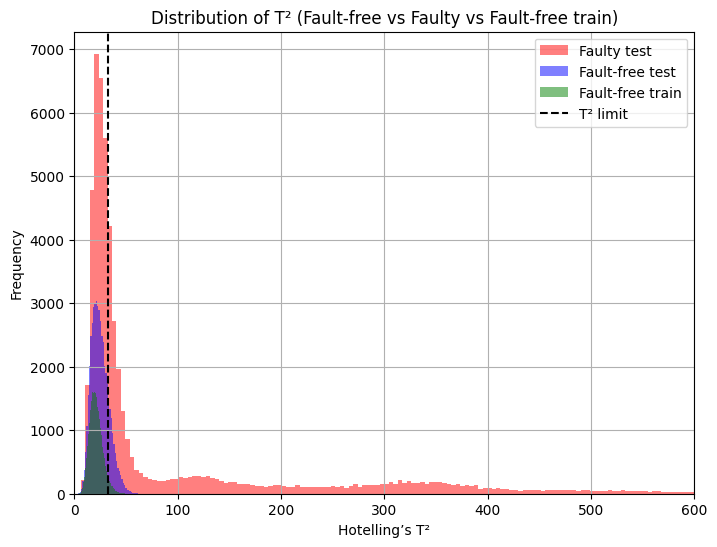

faulty above the t2 limit: 57.54 %
faulty-free above the t2 limit: 17.68 %
faulty-free training set above the t2 limit: 4.75 %


In [25]:
from scipy.stats import f

n = X_ff_train_pca.shape[0]
a = X_ff_train_pca.shape[1]  
alpha = 0.95
T2_limit = (a*(n - 1)/(n - a)) * f.ppf(alpha, a, n - a)

print("T² limit:", T2_limit)

plt.figure(figsize=(8,6))
plt.hist(T2_f, bins=2000, alpha=0.5, label='Faulty test', color='red')
plt.hist(T2_ff, bins=50, alpha=0.5, label='Fault-free test', color='blue')
plt.hist(T2_ff_train, bins=50, alpha=0.5, label='Fault-free train', color='green')
plt.axvline(T2_limit, color='black', linestyle='--', label='T² limit')
plt.xlabel("Hotelling’s T²")
plt.ylabel("Frequency")
plt.title("Distribution of T² (Fault-free vs Faulty vs Fault-free train)")
plt.xlim(0, 600)
# plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()

print("faulty above the t2 limit:",round(np.count_nonzero(T2_f > T2_limit)/len(T2_f)*100,2),"%")
print("faulty-free above the t2 limit:",round(np.count_nonzero(T2_ff > T2_limit)/len(T2_ff)*100,2),"%")
print("faulty-free training set above the t2 limit:",round(np.count_nonzero(T2_ff_train > T2_limit)/len(T2_ff_train)*100,2),"%")

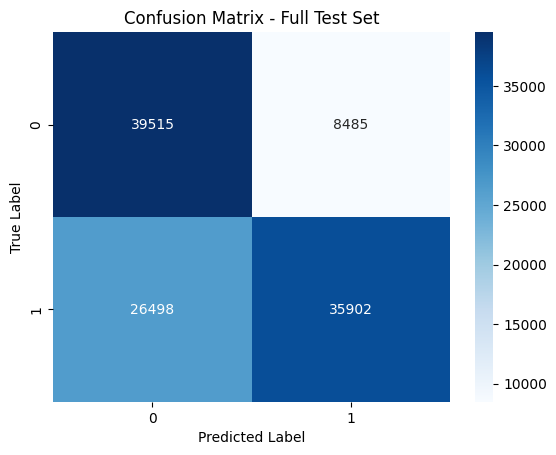

              precision    recall  f1-score   support

         0.0       0.60      0.82      0.69     48000
         1.0       0.81      0.58      0.67     62400

    accuracy                           0.68    110400
   macro avg       0.70      0.70      0.68    110400
weighted avg       0.72      0.68      0.68    110400



In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

y_pred_ff = (T2_ff > T2_limit).astype(int) # 0 = normal, 1 = fault
y_pred_f = (T2_f > T2_limit).astype(int)

labels_ff = np.zeros(len(y_pred_ff))
labels_f = np.ones(len(y_pred_f))

# Combine predictions and labels
y_true = np.concatenate([labels_ff, labels_f])  # 0s then 1s
y_pred = np.concatenate([y_pred_ff, y_pred_f])  # predictions for both sets

# Compute full confusion matrix
cf_total = confusion_matrix(y_true, y_pred)

# Plot
sns.heatmap(cf_total, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Full Test Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print(classification_report(y_true, y_pred))

## Compare and interpret

- I don't think that the pre-processing was sufficient enough for a good PCA-T2 outlier detection based on the accuracy and the amount of false negatives. As seen in the list below, we can clearly see that the model still discriminates way too many rows from the faulty-free test set. The numbers below are based on a 21-dimentional PCA - which gave just over 71% cumulative variance. Bumping the number of dimensions up for close to 100% variance barely made a difference overall.

    dim=21
    - faulty above the t2 limit: 57.54 %
    - faulty-free above the t2 limit: 17.68 %
    - faulty-free training set above the t2 limit: 4.75 %

    dim=41
    - faulty above the t2 limit: 62.48 %
    - faulty-free above the t2 limit: 17.74 %
    - faulty-free training set above the t2 limit: 4.81 %

Looking at the scatterplot, we can clearly see that the blue (fault-free data) is fitting well to the PCA model by being around (0,0), where the red (faulty data) is scattered around but also overlaps the blue. So as far as i can interpret, the PCA model does not give a clear outline of what faulty data is. I guess the overlapping data comes down to relatively small variances, which does not reslut in a significant difference.

